#Understand the Business Problem

##Problem Statement:
Zomato has been observing the orders happening online and
offline, Due to offline orders, Zomato is not able to attract customers with diverse items and
offers, and the user subscription also getting low. so it has decided to give you the project
on the same. Now the problem statement is that Zomato wants to know whether the
customer would order the orders online or offline so that Zomato can take further
strategies to improve the online order.
##Objective:
The Aim is to classify the orders that have been ordered online and offline. And
identify the patterns that lead to orders online orders as well as offline. Your model should
be able to classify the classes effectively.


#Understand the Dataset

<ol>
<li>Name - Name of the restaurant. - Object datatype
<li>Online Order - The customer ordered the menu online or not. - Object datatype
<li>Book table - The customer has booked the table or not. - Object datatype
<li>Rate - Rating of the restaurant that has by the customer. - Numerical datatype
<li>Votes - The votes have been given by the customer to the restaurant. - Numerical datatype
<li>Location - The city name where the restaurant is located. - Object datatype
<li>Rest Type - The type of restaurant. - Object datatype
<li>Dish liked - Dishes liked by the customer from the restaurant. - Object datatype
<li>Cuisines - The cuisines that have been prepared by the restaurant. - Object datatype
<li>Approx Cost for two people - The approximate cost of the customer for 2 people. -Number datatype
<li>Reviews list - The reviews made by the customers on the restaurant. - Object datatype
<li>Menu Item - The menu items that are usually available at the restaurant. - Object datatype
<li>Listed in (type) - Contains the type of the meal. - Object datatype
<li>Listed in (city) - This contains the neighborhood in which the restaurant is listed. -Object datatype</ol>

In [10]:
#Import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report

##Load the dataset as directed

In [ ]:
#open your Gdrive and create a directory "kaggle"
#upload the given json file in the "kaggle" directory
#Mount your Gdrive with given Colab
#then click on the Gdrive icon in your left
#open the "kaggle" directory from here
#execute the remaining commands as directed.
#careful! you have to unzip the file.

In [12]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/kaggle"

In [15]:
%cd "/content/drive/MyDrive/kaggle"

/content/drive/MyDrive/kaggle


In [16]:
!kaggle datasets download -d rangabashyamg/zomato-cleaned

 97% 79.0M/81.5M [00:03<00:00, 28.0MB/s]
100% 81.5M/81.5M [00:03<00:00, 21.6MB/s]


In [17]:
!unzip \*.zip && rm *.zip

Archive:  zomato-cleaned.zip
replace zomato_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: zomato_clean.csv        


In [18]:
#code here
df= pd.read_csv("zomato_clean.csv")
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Read the data

### Find:
<ol>
<li>Shape of the dataset
<li>entire Info the dataset
<li>Five Point Summary
<li>Null values
</ol>

In [14]:
#shape
df.shape

(49395, 14)

In [13]:
#info
info=df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49395 entries, 0 to 49394
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       49395 non-null  object 
 1   name          49395 non-null  object 
 2   online_order  49395 non-null  object 
 3   book_table    49395 non-null  object 
 4   rate          49395 non-null  float64
 5   votes         49395 non-null  int64  
 6   location      49395 non-null  object 
 7   rest_type     49395 non-null  object 
 8   cuisines      49395 non-null  object 
 9   cost          49395 non-null  float64
 10  reviews_list  49395 non-null  object 
 11  menu_item     49395 non-null  object 
 12  type          49395 non-null  object 
 13  city          49395 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.3+ MB


In [12]:
#5point summary
df.describe()

,rate,votes,cost
count,49395.000000,49395.000000,49395.000000
mean,3.731768,297.008159,361.298709
std,0.411000,820.097670,230.397663
min,1.800000,0.000000,1.000000
25%,3.500000,9.000000,200.000000
50%,3.800000,47.000000,350.000000
75%,4.000000,212.000000,500.000000
max,4.900000,16832.000000,950.000000


In [15]:
#null value dedection
df.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

### We are just gonna perform the ML Part here. Already the dataset is cleaned, Don't worry...
### Lets get Started!!

##Split the dataset into train and test data sets and Perform the scaling on both sets if necessary

In [19]:
#remove the comment to import required libraries
from sklearn.model_selection import train_test_split
#Remember 'X' has the independent features and 'y' has the dependent / target variable

In [56]:
'''from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Encode each feature column
columns_to_encode = ["book_table","rate","votes","cost"]
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])'''

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.book_table= le.fit_transform(df.book_table)

In [21]:
features=["book_table","rate","votes","cost"]
X=df[features]

In [22]:
y=df["online_order"]

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=1)

## Build the base models:

Build models like:<br>
<ol>
<li>logistic regression
<li>Decision trees
<li>KNN
<li>Gradient Boosting
<li>Gaussian Naive Bayes
</ol>

Along with the models, let know the Accuracy score and Classification reports

In [24]:
#Logistic reg
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
from sklearn.metrics import accuracy_score, classification_report


In [45]:
#modelfit
Lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred=Lr.predict(X_test)
acc= accuracy_score(y_pred,y_test)
clr_rpt= classification_report(y_pred,y_test)
print(acc)
print(clr_rpt)

0.624603549497267
              precision    recall  f1-score   support

          No       0.22      0.59      0.32      2191
         Yes       0.90      0.63      0.74     12628

    accuracy                           0.62     14819
   macro avg       0.56      0.61      0.53     14819
weighted avg       0.80      0.62      0.68     14819



In [27]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
acc= accuracy_score(y_pred,y_test)
clr_rpt= classification_report(y_pred,y_test)
print(acc)
print(clr_rpt)

0.8497199541129631
              precision    recall  f1-score   support

          No       0.88      0.78      0.83      6789
         Yes       0.83      0.91      0.87      8030

    accuracy                           0.85     14819
   macro avg       0.86      0.84      0.85     14819
weighted avg       0.85      0.85      0.85     14819



In [28]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
Knn.fit(X_train,y_train)
y_pred=Knn.predict(X_test)
acc= accuracy_score(y_pred,y_test)
clr_rpt= classification_report(y_pred,y_test)
print(acc)
print(clr_rpt)

0.7654362642553478
              precision    recall  f1-score   support

          No       0.68      0.72      0.70      5596
         Yes       0.82      0.79      0.81      9223

    accuracy                           0.77     14819
   macro avg       0.75      0.76      0.75     14819
weighted avg       0.77      0.77      0.77     14819



In [29]:
#GBC
from sklearn.ensemble import GradientBoostingClassifier
gn=GradientBoostingClassifier()
gn.fit(X_train,y_train)
y_pred=gn.predict(X_test)
acc= accuracy_score(y_pred,y_test)
clr_rpt= classification_report(y_pred,y_test)
print(acc)
print(clr_rpt)


0.7254875497671908
              precision    recall  f1-score   support

          No       0.56      0.70      0.62      4778
         Yes       0.84      0.74      0.78     10041

    accuracy                           0.73     14819
   macro avg       0.70      0.72      0.70     14819
weighted avg       0.75      0.73      0.73     14819



In [30]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
Gnb=GaussianNB()
Gnb.fit(X_train,y_train)
y_pred=Gnb.predict(X_test)
acc= accuracy_score(y_pred,y_test)
clr_rpt= classification_report(y_pred,y_test)
print(acc)
print(clr_rpt)

0.6017949929145017
              precision    recall  f1-score   support

          No       0.13      0.52      0.21      1517
         Yes       0.92      0.61      0.73     13302

    accuracy                           0.60     14819
   macro avg       0.53      0.57      0.47     14819
weighted avg       0.84      0.60      0.68     14819



Compare the model and find the optimal one.

In [52]:
#remove the comment to import required libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
# Define the models to be evaluated - store it in a variable 'models'
models={'logistic_regression':Lr,
        'Decision trees':dt,
        'KNN':Knn,'Gradient Boosting':gn,'Gaussian Naive Bayes':Gnb}

In [60]:
#results=[]
#for model in models:
  #scores=cross_val_score(model,X,y,cv=5,scoring='accuracy')
  #results.append(scores)
from sklearn.preprocessing import LabelEncoder


In [61]:
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

In [36]:
#for i, model in enumerate(models):
  #print("Cross-Validation Score:",results[i])

Cross-Validation Score: [0.61838243 0.62739144 0.59854236 0.63052941 0.63690657]
Cross-Validation Score: [0.79167932 0.80048588 0.81415123 0.8478591  0.76839761]
Cross-Validation Score: [0.67962344 0.74734285 0.77902622 0.77214293 0.70654925]
Cross-Validation Score: [0.71059824 0.71788643 0.71444478 0.71181294 0.72001215]
Cross-Validation Score: [0.60370483 0.60168033 0.59732766 0.61109424 0.59024193]


logistic_regression: AUC = 0.62 (+/- 0.01)
Decision trees: AUC = 0.85 (+/- 0.03)
KNN: AUC = 0.78 (+/- 0.06)
Gradient Boosting: AUC = 0.77 (+/- 0.00)
Gaussian Naive Bayes: AUC = 0.61 (+/- 0.01)


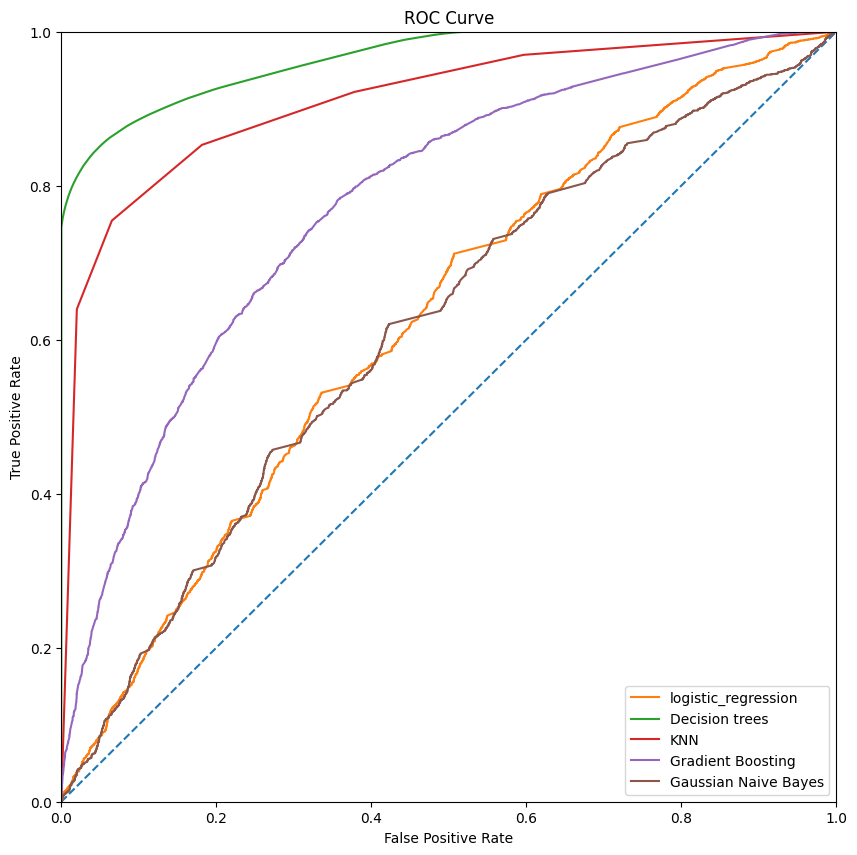

In [62]:
# Compare the performance of models using 5-fold cross-validation and ROC curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
    print(f"{name}: AUC = {scores.mean():.2f} (+/- {scores.std():.2f})")
    model.fit(X, y)
    y_proba = model.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y_binary, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.legend(loc="lower right")
plt.show()